### **Importing Necessary Libraries**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

In [24]:
def convolve_circular_circulant(x,h):

    if len(x)<len(h):                                                           # making the array with the bigger size =  x
        t = h.copy()
        h = x.copy()
        x = t.copy()

    h = np.pad(h, (0,max(len(x),len(h)) - len(h)))                              # pad necessary zeros at the end of h
    H = scipy.linalg.circulant(h)                                               # create circulant matrix H
    y = np.matmul(H,x)                                                          # Pointwise multiply H and x

    return y

In [25]:
def convolve_circular_using_dft(x,h):

    N = max(len(x),len(h))                                                      # Finding the signal with max length = N

    X = np.fft.fft(x,N)                                                         # Finding N point dft of x
    H = np.fft.fft(h,N)                                                         # Finding N point dft of h

    y = np.real(np.fft.ifft(H*X))                                               # Pointwise multiply H and X and take idft

    return y

In [33]:
# Signal Construction

fs = 200                                                                        # Sampling Frequency
f = 20                                                                          # Frequency of Given Sinusoid
t = np.arange(0,1,1/fs)                                                         # Creating TimeStamps array
eta = np.random.normal(size = len(t), loc = 0, scale = 0.2)                     # Noise
x = np.sin(2*math.pi*f*t) + 0.8*eta                                             # Final Signal (x)
h = np.ones(3)*1/3                                                              # Filter (h)

N = max(len(h),len(x))
t_y = np.arange(0,N*1/fs,1/fs)

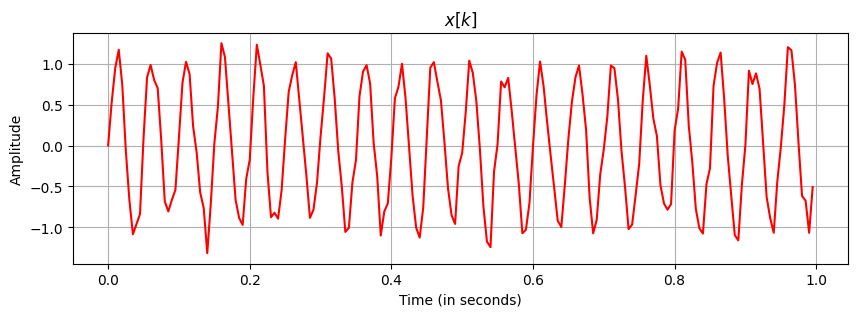

In [34]:
plt.figure(figsize = (10,3))

plt.plot(t,x,'r')
plt.title('$x[k]$')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')
plt.grid()

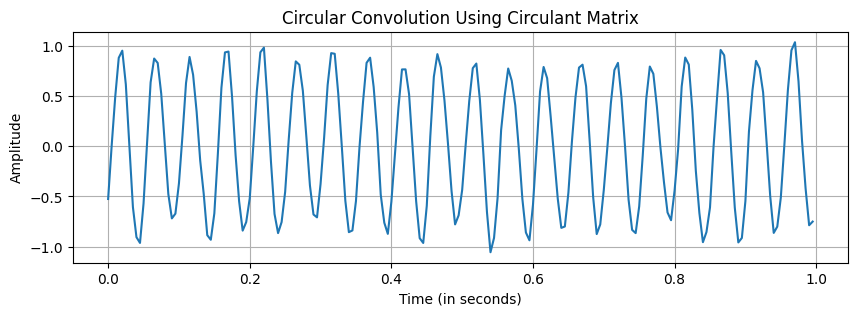

In [35]:
plt.figure(figsize = (10,3))
plt.plot(t_y,convolve_circular_circulant(x,h))
plt.title('Circular Convolution Using Circulant Matrix')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')
plt.grid()

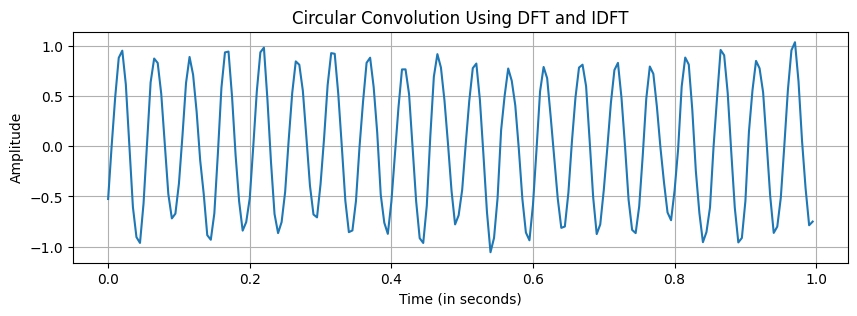

In [36]:
plt.figure(figsize = (10,3))
plt.plot(t_y,convolve_circular_using_dft(x,h))
plt.title('Circular Convolution Using DFT and IDFT')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')
plt.grid()

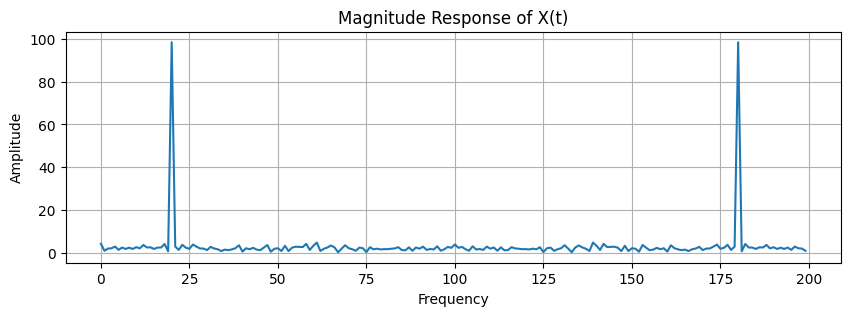

In [30]:
plt.figure(figsize = (10,3))
plt.plot(np.abs(np.fft.fft(x,N)))
plt.title('Magnitude Response of X(t)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()

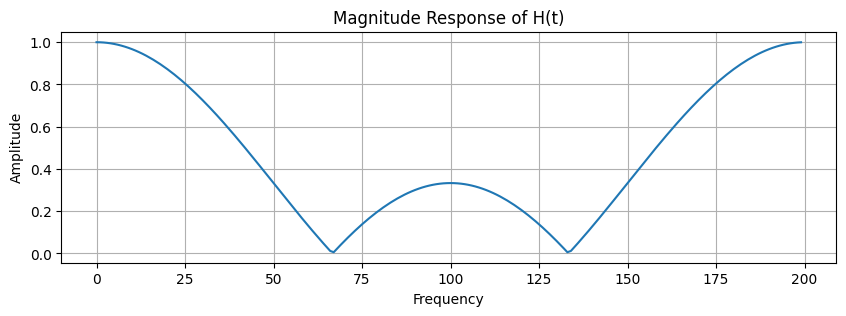

In [31]:
plt.figure(figsize = (10,3))
plt.plot(np.abs(np.fft.fft(h,N)))
plt.title('Magnitude Response of H(t)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()

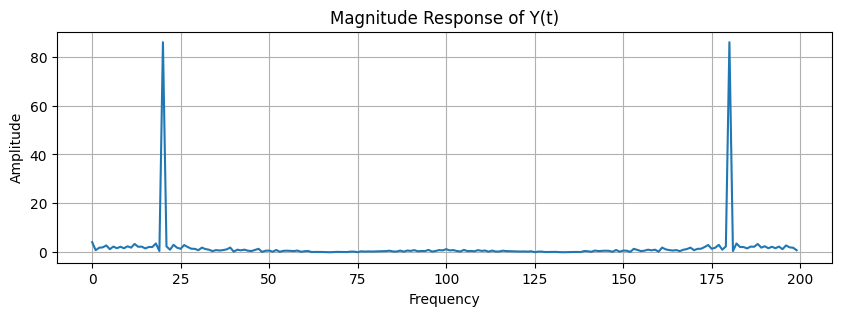

In [32]:
plt.figure(figsize = (10,3))
plt.plot(np.abs(np.fft.fft(convolve_circular_using_dft(x,h),N)))
plt.title('Magnitude Response of Y(t)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()